In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation

__ATTENTION:__ Sometimes there are some errors with cells or class etributes. In this case just
try to restart the python kernel.

In [32]:
from src import ShrodingerEquation, PotentialBarriers

Запишем общий вид уравнения Шрёдингера

$$H \langle \psi \rangle = E \psi$$

где $\psi$ -- волновая функция, $H$ -- оператор полной энергии (гамильтониан), $E$ -- полная энергия 
системы. Вид гамильтониана

$$H = - \frac{\hbar}{2m} \Delta + U(r)$$

где $\Delta$ -- оператор Лапласа.

Это запись для уравнения Шрёдингера, независимого от времени (стационарного состояния). При записи, 
фактически в правой части мы перешли от оператора, дающего зависимость по времени к величине полной 
энергии. Для того, чтобы записать уравнение, зависящее от времени перейдем к операторам в обеих частях.

$$H \langle \psi \rangle = E  \langle \psi \rangle$$

где $E$ теперь является оператором

$$E = i \hbar \frac{\partial}{\partial t}$$

Теперь уравнение имеет следующий вид

$$i \hbar \frac{\partial \psi(r, t)}{\partial t} = H \langle \psi(r, t) \rangle$$

В этом случае решение дифференциального уравнения можно выразить следующим образом

$$\psi(r, t) = \exp(-i H t) \psi(r, 0)$$

Будем рассматривать распространение волнового пакета вдоль оси $Ox$. Тогда гамильтониан запишем следующим 
образом

$$H = - \frac{\hbar}{2m} \frac{\partial^2}{\partial x^2} + U(x)$$

Для вычисления второй производной воспользуемся формулой вычислительной метематики

$$\frac{\partial^2 f}{\partial x^2} _{x = j \Delta x} = \frac{f_{j+1} - 2f_{j} + f_{j-1}}{dx^2}$$

Тогда, если $f$ представляет собой вектор дискретных значений

$$
\begin{pmatrix}
f_1 \\
f_2 \\
\dots \\
f_N
\end{pmatrix}
$$

То вектор значений вторых происзводных этой функции в узлах построенной сетки можно получить с помощью
трехдиагональной матрицы

$$
\begin{pmatrix}
f_1'' \\
f_2'' \\
\dots \\
f_N''
\end{pmatrix}
= \frac{1}{dx^2}
\begin{pmatrix}
-2 &  1 & 0 & 0     & \dots & 0 & 0 \\
1  & -2 & 1 & 0     & \dots & 0 & 0 \\
0  & 1  &-2 & 1     & \dots & 0 & 0 \\
   &    &   & \dots &       &   &   \\
0  & 0  & 0 & 0     & \dots &-2 & 1 \\
\end{pmatrix}
\begin{pmatrix}
f_1 \\
f_2 \\
\dots \\
f_N
\end{pmatrix}
$$

Значение потенциальной энергии $U$ так же можно представить в виде вектора значений в узлах сетки. Тогда
действие оператора $H$ на вектор значений волновой функции $\psi$ можно представить, как умножение вектора 
значений волновой функции на матрицу

$$
H =
- \frac{\hbar}{2 m dx^2}
\begin{pmatrix}
-2 &  1 & 0 & 0     & \dots & 0 & 0 \\
1  & -2 & 1 & 0     & \dots & 0 & 0 \\
0  & 1  &-2 & 1     & \dots & 0 & 0 \\
   &    &   & \dots &       &   &   \\
0  & 0  & 0 &       & \dots &-2 & 1 \\\end{pmatrix}
\begin{pmatrix}
V_1 &  0  & 0   & 0     & \dots & 0 & 0 \\
0   & V_2 & 0   & 0     & \dots & 0 & 0 \\
0   & 0   & V_3 & 0     & \dots & 0 & 0 \\
    &     &     & \dots &       &   &   \\
0   & 0   & 0   & 0     & \dots & 0 & V_N \\\end{pmatrix}
$$

In [33]:
# зададим количество точек на пространственной сетке
N = 1000
# зададим сетку пространственного диапазона
x_start = -100
x_end = 100

x_dense, dx = np.linspace(x_start, x_end, N, retstep=True)

# зададим параметры волнового пакета
# начальное положение
x0 = -50
# ширина
sigma0 = 5.0
# начальная энергия и импульс (считаем что m = 1)
E0 = 0.5
p0 = math.sqrt(2*E0)

# зададим начальный вид волновой функции, как гаусовский полновой пакет
psi0 = ShrodingerEquation.GaussWavePackage(x_dense, x0, sigma0, p0)

# зададим потенциальный барьер
V_dense = np.zeros(N)

In [34]:
psi = ShrodingerEquation.WaveFunction(psi0, x_dense, V_dense)

##### Простой волновой пакет в пространстве

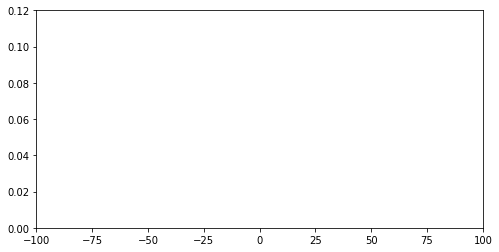

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# don't forget to set an axis limits
ax.set_xlim(x_start, x_end)
ax.set_ylim(0.0, 0.12)


# next we need to create and initial empty frame
ln1, = plt.plot([], [])

# number of frames per second
frm_p_sec = 30

# define the animation function
# this function describe how we will change our frame
# i -- is a number of frame
# it's obvious that the nember of frame consists of time
def animate(i):
    # Lets explain what does it for
    # in matplotlib animation the animate function really wants to
    # depend of i (number of frame)
    # so, if the interpritator see that i is not used
    # it waise a warning
    # but in pur case we don't need to use the number of frame, so we make  an
    # artificial using of variable i to avoid a wornings
    I = i
    psi.PsiTimeEvolute()
    # update information about 1st plot
    ln1.set_data(x_dense, psi.WaveFunctioProbability())

In [36]:
ani = animation.FuncAnimation(fig, animate, frames=240, interval=frm_p_sec)

/home/pavel/.local/lib/python3.8/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [37]:
# # here we can save the animation like a video
# f = r"./wave_package.mp4" 
# writervideo = animation.FFMpegWriter(fps=60) 
# ani.save(f, writer=writervideo)

##### Волновой пакет в параболической потенциаьльной яме

In [52]:
# Потерциальную параболическую потенциальную яму
omega = 1/192
V_dense = PotentialBarriers.ParabolaPotential(x_dense, omega)

# зададим новую волновую функцию
# зададим начальный вид волновой функции, как гаусовский полновой пакет
x0 = 0
psi0 = ShrodingerEquation.GaussWavePackage(x_dense, x0, sigma0, p0)
psi = ShrodingerEquation.WaveFunction(psi0, x_dense, V_dense)

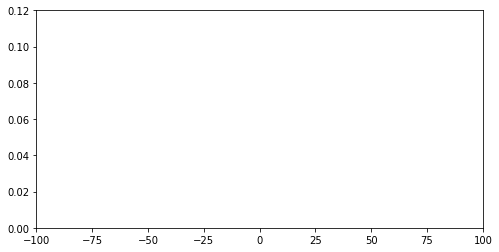

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# don't forget to set an axis limits
ax.set_xlim(x_start, x_end)
ax.set_ylim(0.0, 0.12)


# next we need to create and initial empty frame
ln1, = plt.plot([], [])
ln2, = plt.plot([], [])

# number of frames per second
frm_p_sec = 30

# define the animation function
# this function describe how we will change our frame
# i -- is a number of frame
# it's obvious that the nember of frame consists of time
def animate(i):
    # Lets explain what does it for
    # in matplotlib animation the animate function really wants to
    # depend of i (number of frame)
    # so, if the interpritator see that i is not used
    # it waise a warning
    # but in pur case we don't need to use the number of frame, so we make  an
    # artificial using of variable i to avoid a wornings
    I = i
    psi.PsiTimeEvolute()
    # update information about 1st plot
    ln1.set_data(x_dense, psi.WaveFunctioProbability())
    ln2.set_data(x_dense, V_dense)

In [40]:
ani = animation.FuncAnimation(fig, animate, frames=240, interval=frm_p_sec)

In [41]:
# here we can save the animation like a video
f = r"./oscilator.mp4" 
writervideo = animation.FFMpegWriter(fps=60) 
ani.save(f, writer=writervideo)